### Moody diagram

Adapted by Philipp Schlatter from Jim Turner
2024 LSTM / FAU

Colab: https://colab.research.google.com/github/pschlatt1/notebooks/blob/main/moody.ipynb

Some preliminaries:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import brentq

The Moody diagram (1944) is a graphical representation of the Colebrook formula (1939),
$$\frac{1}{\sqrt{\lambda}} =-2.0 \log_{10} \left(  \frac{1}{3.7} \frac{\varepsilon}{D} + \frac{2.51}{Re \sqrt{\lambda}} \right) \ .$$

In [2]:
# define the relevant functions
@np.vectorize
def solve_colebrook(rel_roughness, Re):
    def colebrook(lam):
        return 1/np.sqrt(lam) + 2.0*np.log10(rel_roughness/3.7 + 2.51/(Re*np.sqrt(lam)))
    return brentq(colebrook, 0.005, 0.1)

def format_num(num, precision=1):
    """Format a decimal number in LaTeX math.

    Numbers with a base-10 exponent less than -3 or greater than 3 are formatted
    in scientific notation.

    Positional argument:
    num -- the number to format

    Keyword argument:
    precision -- the precision of the mantissa for scientific notation

    """
    exponent = np.floor(np.log10(num))
    mantissa = num / 10**exponent
    if -3.1 < exponent < 3.1:
        return '${}$'.format(num)
    else:
        format_str = r'${:.'+str(precision)+r'f}\times10^{{{:.0f}}}$'
        return format_str.format(mantissa, exponent)

def moody():

    # Change figure size and font to match LaTeX
    fig_width = 450 / 72.27
    plt.rc('axes', labelsize=10)
    plt.rc('xtick', labelsize=8)
    plt.rc('ytick', labelsize=8)
    plt.rc('figure', figsize=(fig_width, fig_width*0.7))

    # Axes parameters, data points, label values
    xmin, xmax = 5E2, 1E8
    ymin, ymax = 0.006, 0.1
    laminar_Re = np.linspace(1, 2100, 100)
    turbulent_Re = np.logspace(np.log10(2100), np.log10(xmax), 100)
    rel_roughness = np.array((5E-2, 4E-2, 3E-2, 2E-2, 1.5E-2, 1E-2, 5E-3,
                              2E-3, 1E-3, 5E-4, 2E-4, 1E-4, 5E-5, 2E-5, 1E-5,5e-6, 1e-6))
    friction_labels = (0.008, 0.009, 0.01, 0.012, 0.014, 0.016, 0.018, 0.02, 0.025,
                       0.03, 0.035, 0.04, 0.045, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1)

    # Laminar flow
    plt.plot(laminar_Re, 64/laminar_Re, 'r-')
    plt.annotate("laminar", xy=(1E3, 0.05), xycoords='data',
                 xytext=(20,-30), textcoords='offset points', ha='right',
                 backgroundcolor='w', arrowprops={'arrowstyle': '->'})

    # Turbulent flow
    for rough in rel_roughness:
        plt.plot(turbulent_Re, solve_colebrook(rough, turbulent_Re), 'b-')

    # Smooth pipe
    plt.plot(turbulent_Re, solve_colebrook(0, turbulent_Re), 'k-')
    plt.annotate("smooth pipe", xy=(2E6, solve_colebrook(0, 2E6)), xycoords='data',
                 xytext=(-20,-20), textcoords='offset points', ha='right',
                 backgroundcolor='w', arrowprops={'arrowstyle': '->'})

    # Transitional flow
    plt.axvspan(2100, 4000, color='#d9d9ff')
    plt.annotate("transitional flow", xy=(3050,0.0135), xycoords='data',
                 xytext=(20,-20), textcoords='offset points',
                 backgroundcolor='w', arrowprops={'arrowstyle': '->'})

    # Grid
    plt.grid(which='both', color='gray', ls='-', lw=0.2)
    for line in plt.gca().lines:
        line.set_zorder(3)

    # Reynolds number labels (horizontal axis)
    plt.xlim(xmin, xmax)
    plt.xscale('log')
    plt.xlabel(r"Reynolds number $\mathit{Re}=UD/\nu$")

    # Friction factor labels (left vertical axis)
    plt.ylim(ymin, ymax)
    plt.yscale('log')
    plt.gca().tick_params(which='both', right='off', top='off')
    plt.yticks(friction_labels, [format_num(fric) for fric in friction_labels])
    plt.ylabel(r"friction factor $\lambda$")

    # Relative roughness labels (right vertical axis)
    plt.twinx()
    plt.ylim(ymin, ymax)
    plt.yscale('log')
    plt.yticks(solve_colebrook(rel_roughness, xmax),
               [format_num(rough, 0) for rough in rel_roughness])
    plt.gca().tick_params(which='both', bottom='off', top='off', left='off', right='off')
    plt.ylabel(r"relative roughness $\varepsilon/D$")

    plt.title('Moody diagram for pipes')

    # Save figure
    plt.savefig("moody-diagram.eps", bbox_inches='tight')

Plot the Moody diagram:

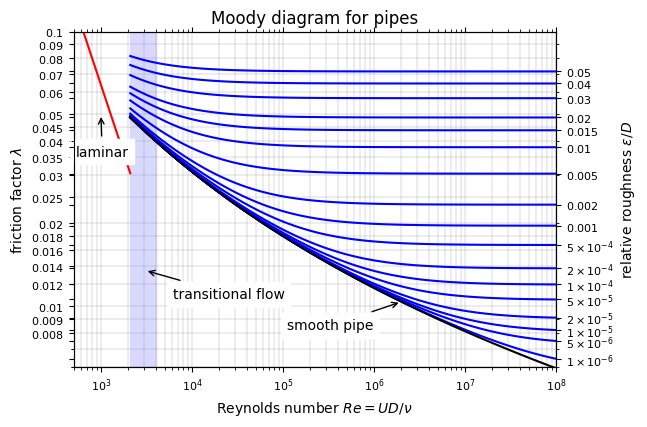

In [3]:
moody()

The Reynolds number is based on the bulk velocity $U$ and the diameter $D$, i.e. $$Re=\frac{U D}{\nu}\ .$$
The friction factor $\lambda$ is defined as
$$\lambda=\frac{D}{L} \frac{\Delta p}{\frac12 \rho U^2} \ ,$$ for a pipe of length $L$ with a pressure drop of $\Delta p$.

You can use the above function also to compute specific values:

In [ ]:
# Compute friction factor for specific values
solve_colebrook(0.01,Re=10000)

array(0.04312658)